### Análise exploratória sobre o número de ocorrências de crimes nos estados brasileiros

* O conjunto de dados de segurança pública utilizado nesta análise exploratória foi retirado do site do Ministério da Justiça e se refere à ocorrências criminais relatadas durante os anos de 2015 a 2022.   

* O objetivo dessa análise é levantar algumas perguntas sobre a quantidade de ocorrências criminais no Brasil e extrair informações úteis a partir delas. 

* Fonte do conjunto de dados: https://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica

### Importante bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns

### Importando o dataset

In [2]:
data = pd.read_excel('indicadoressegurancapublicauf.xlsx', sheet_name=0)

### Visualizando o dataset

In [3]:
data.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0


In [4]:
data.tail()

,UF,Tipo Crime,Ano,Mês,Ocorrências
22333,Tocantins,Roubo a instituição financeira,2015,dezembro,6
22334,Tocantins,Roubo de carga,2015,dezembro,1
22335,Tocantins,Roubo de veículo,2015,dezembro,55
22336,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2
22337,Tocantins,Tentativa de homicídio,2015,dezembro,42


### Renomeando as colunas

In [5]:
data.rename(columns={'UF':'uf', 'Tipo Crime': 'tipo_crime', 'Ano': 'ano', 'Mês':'mes', 
                     'Ocorrências':'ocorrencias'}, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22338 entries, 0 to 22337
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uf           22338 non-null  object
 1   tipo_crime   22338 non-null  object
 2   ano          22338 non-null  int64 
 3   mes          22338 non-null  object
 4   ocorrencias  22338 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 872.7+ KB


### Quais os tipos de ocorrências listadas no dataset?

In [7]:
data['tipo_crime'].unique()

array(['Estupro', 'Furto de veículo', 'Homicídio doloso',
       'Lesão corporal seguida de morte',
       'Roubo a instituição financeira', 'Roubo de carga',
       'Roubo de veículo', 'Roubo seguido de morte (latrocínio)',
       'Tentativa de homicídio'], dtype=object)

### Qual o total de ocorrências durante todo o período (2015 - 2022)?

In [39]:
total_ocorrencias = data[['tipo_crime', 'ocorrencias']].groupby('tipo_crime').sum().reset_index()
total_ocorrencias

,tipo_crime,ocorrencias
0,Estupro,391167
1,Furto de veículo,1792999
2,Homicídio doloso,345102
3,Lesão corporal seguida de morte,5924
4,Roubo a instituição financeira,5245
5,Roubo de carga,144702
6,Roubo de veículo,1594349
7,Roubo seguido de morte (latrocínio),13971
8,Tentativa de homicídio,281328


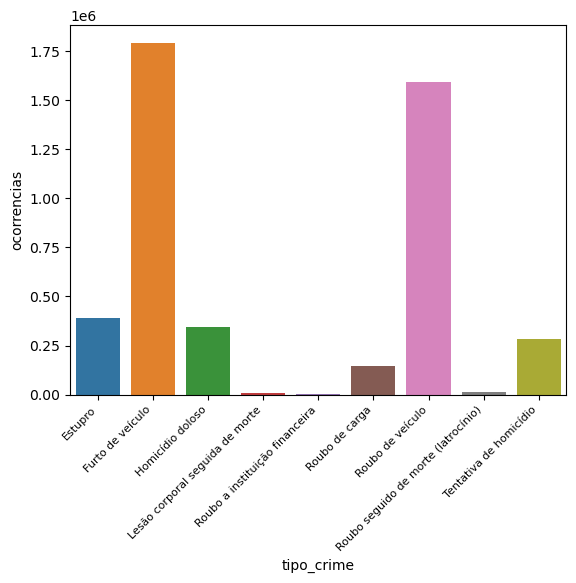

In [40]:
# Gerando o gráfico
ax = sns.barplot(x='tipo_crime', y='ocorrencias', data=total_ocorrencias,)

# Ajustando a rotação dos rótulos no eixo x e o tamanho da fonte
plt.xticks(rotation=45, fontsize=8)

# Alinhando o rótulo das variáveis no eixo x:
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')


### As ocorrências aumentaram ou diminuíram ao longo dos anos?

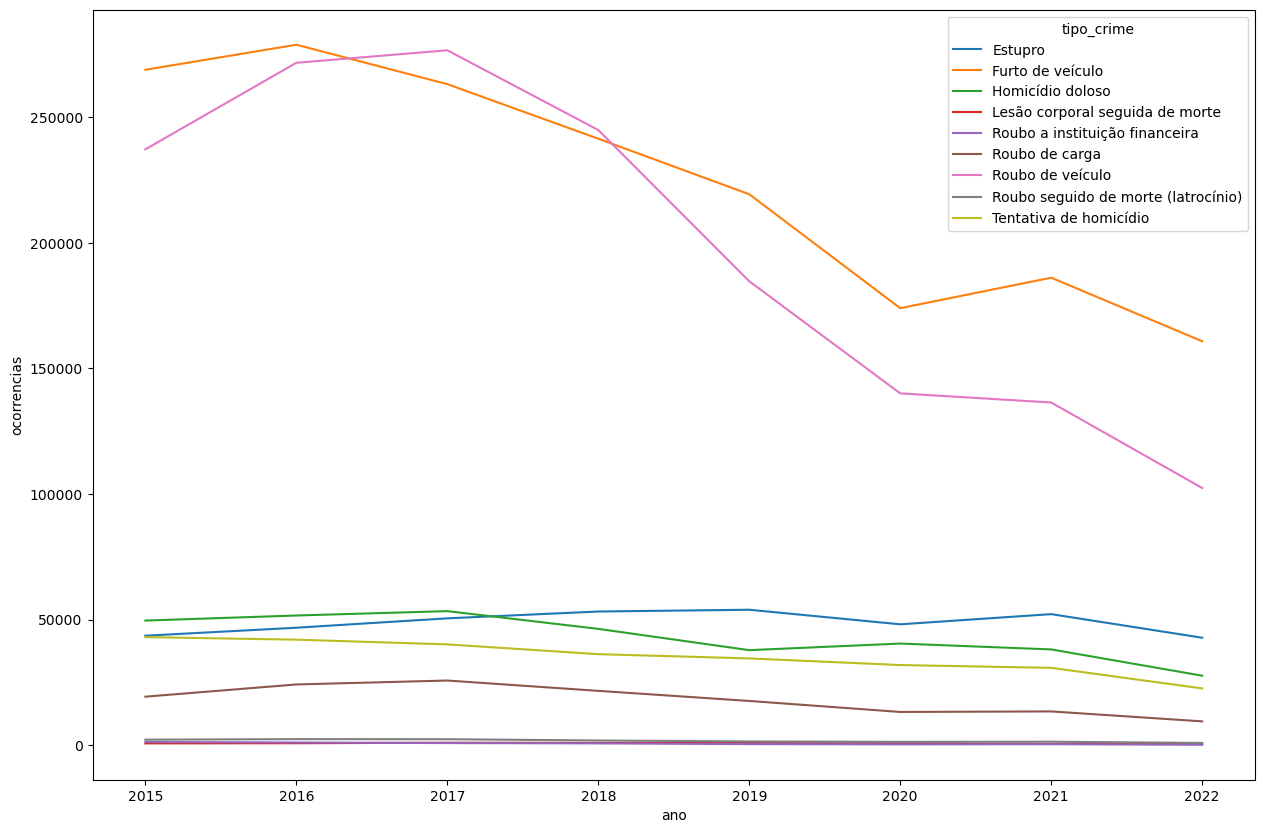

In [10]:
ocorrencias_por_anos = data[['ano', 'ocorrencias', 'tipo_crime']].groupby(['ano', 'tipo_crime']).sum()

plt.figure(figsize=(15, 10))
sns.lineplot(x='ano', y='ocorrencias', hue='tipo_crime', data=ocorrencias_por_anos)
plt.show()

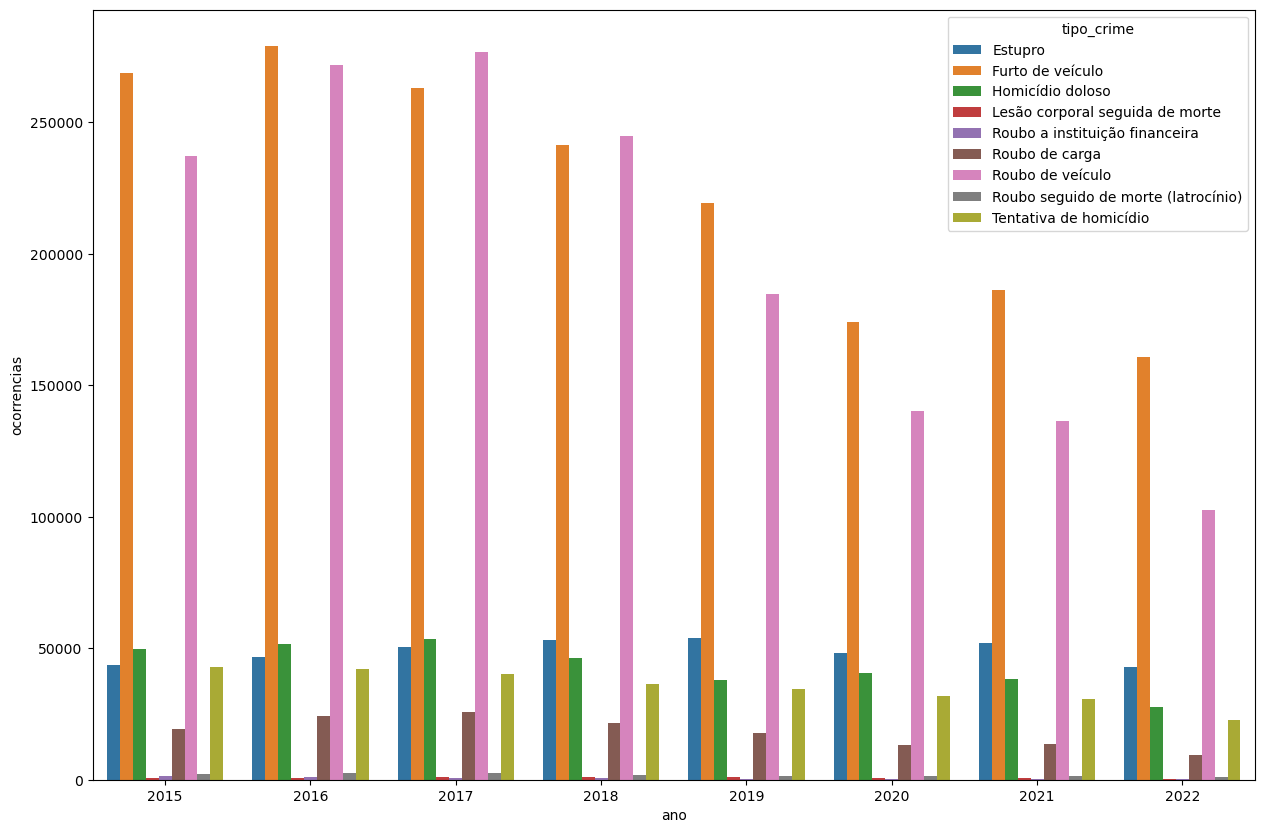

In [44]:
ocorrencias_index_reset = ocorrencias_por_anos.reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='ano', y='ocorrencias', hue='tipo_crime', data=ocorrencias_index_reset)
plt.show()

### Roubo e furto de veículos foram as ocorrências que mais aconteceram. Vamos ver a frequência em que elas ocorreram em cada estado durante todo o período.

In [12]:
uf_furto_roubo = data.loc[(data['tipo_crime'] == 'Furto de veículo') | 
                          (data['tipo_crime'] == 'Roubo de veículo')][['uf', 
                        'tipo_crime', 'ocorrencias']].groupby(['uf', 'tipo_crime']).sum()
uf_furto_roubo

ocorrencias
uf                  tipo_crime                   
Acre                Furto de veículo         3098
                    Roubo de veículo         5550
Alagoas             Furto de veículo         9731
                    Roubo de veículo        20403
Amapá               Furto de veículo         4529
                    Roubo de veículo         2549
Amazonas            Furto de veículo        17741
                    Roubo de veículo        21767
Bahia               Furto de veículo        41348
                    Roubo de veículo        98382
Ceará               Furto de veículo        35858
                    Roubo de veículo        67142
Distrito Federal    Furto de veículo        39741
                    Roubo de veículo        28087
Espírito Santo      Furto de veículo        34274
                    Roubo de veículo        30553
Goiás               Furto de veículo        69173
                    Roubo de veículo        57332
Maranhão            Furto de veículo        19811
                    Roubo de veículo        29715
Mato Grosso         Furto de veículo        19940
                    Roubo de veículo        16221
Mato Grosso do Sul  Furto de veículo        26820
                    Roubo de veículo         5359
Minas Gerais        Furto de veículo       168608
                    Roubo de veículo        64437
Paraná              Furto de veículo       123968
                    Roubo de veículo        57876
Paraíba             Furto de veículo         7070
                    Roubo de veículo        14012
Pará                Furto de veículo        27990
                    Roubo de veículo        38190
Pernambuco          Furto de veículo        41476
                    Roubo de veículo       100571
Piauí               Furto de veículo        18722
                    Roubo de veículo        29300
Rio Grande do Norte Furto de veículo         8044
                    Roubo de veículo        42069
Rio Grande do Sul   Furto de veículo       109399
                    Roubo de veículo        97035
Rio de Janeiro      Furto de veículo       120673
                    Roubo de veículo       286670
Rondônia            Furto de veículo        20482
                    Roubo de veículo        13700
Roraima             Furto de veículo         5542
                    Roubo de veículo         3493
Santa Catarina      Furto de veículo        79460
                    Roubo de veículo        17628
Sergipe             Furto de veículo         6291
                    Roubo de veículo        18232
São Paulo           Furto de veículo       721159
                    Roubo de veículo       422626
Tocantins           Furto de veículo        12051
                    Roubo de veículo         5450

* Visualizando graficamente

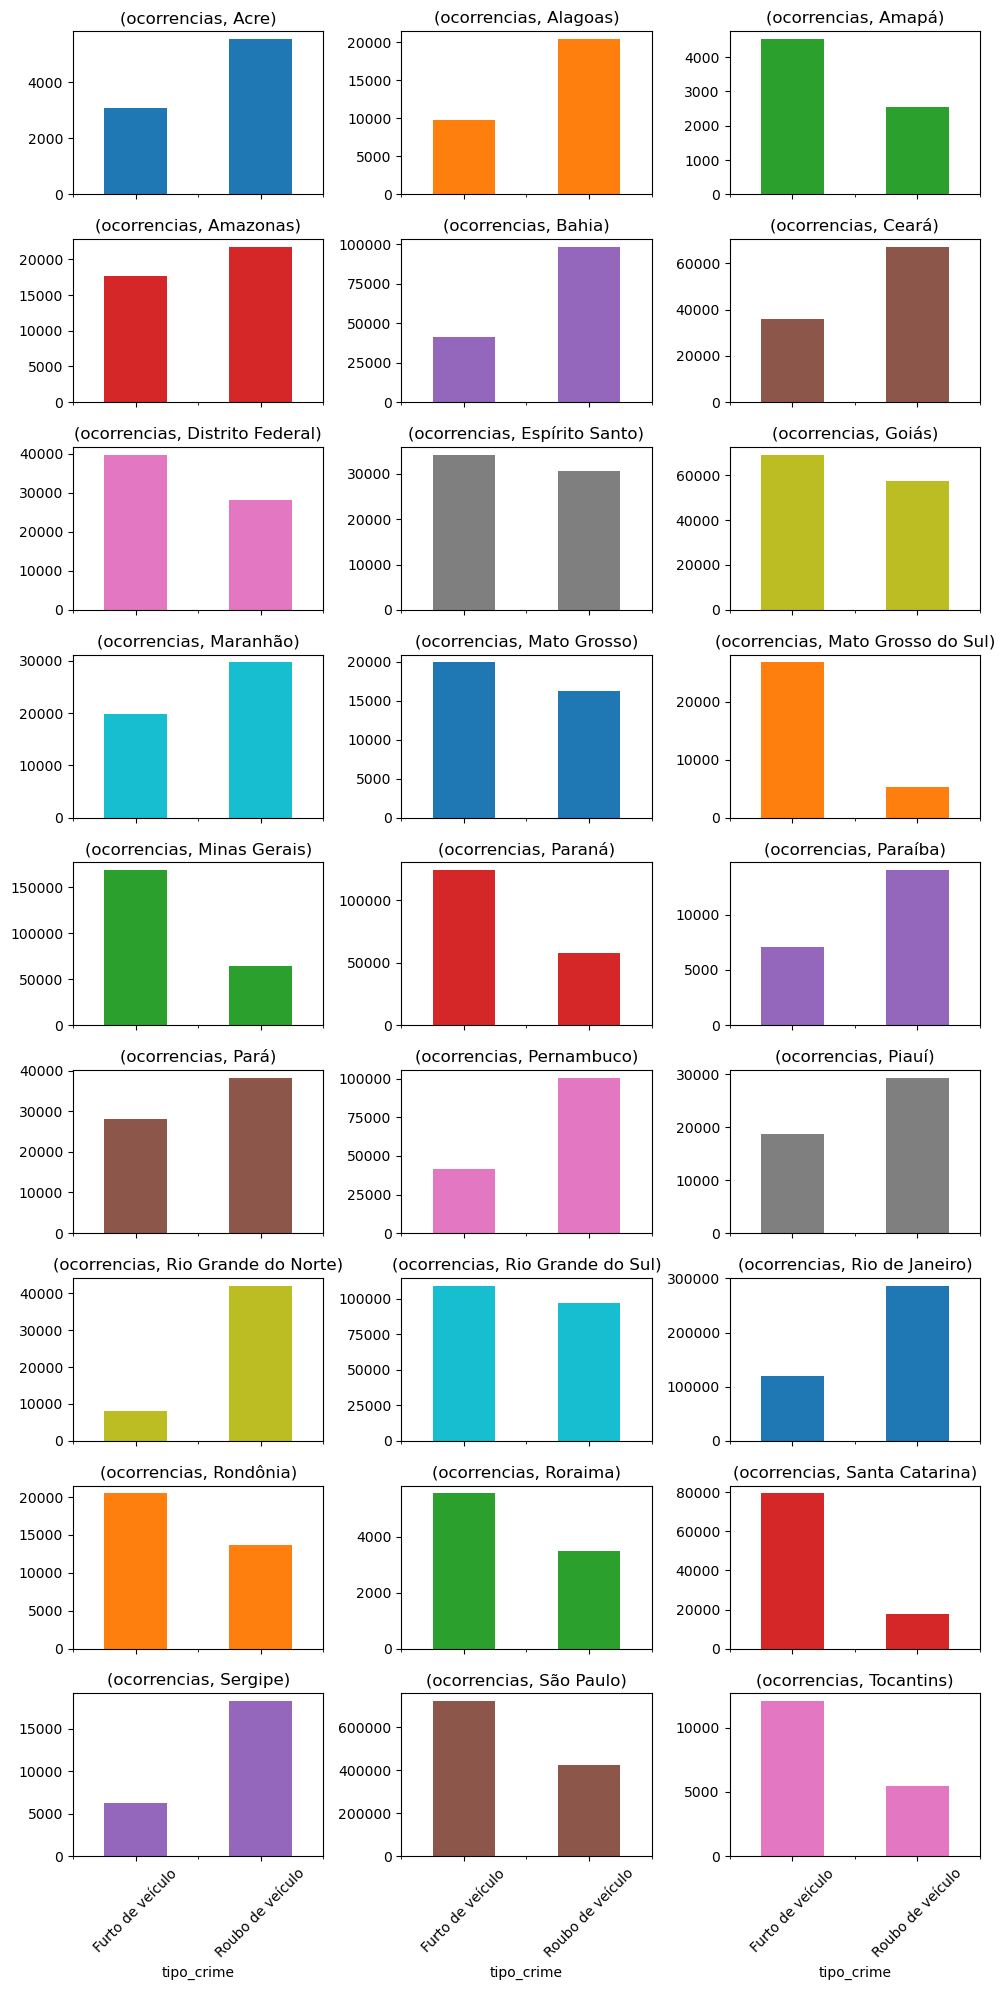

In [13]:
ax = uf_furto_roubo.unstack(level=0).plot(kind='bar', legend=None, subplots=True, rot=45,
                                          figsize=(10, 20), layout=(9, 3))
plt.tight_layout();
# A barra da esquerda corresponde aos furtos, a da direita corresponde aos roubos

### São Paulo foi o estado com o maior número de ocorrências de furtos e roubos de veículos. Vamos ver como esses números variaram ao longo dos anos.

In [25]:
roubo_fur_sp = data.loc[(data['uf'] == 'São Paulo') & ((data['tipo_crime'] == 'Furto de veículo') |
                         (data['tipo_crime'] == 'Roubo de veículo'))][['tipo_crime', 'ocorrencias', 
                         'ano']].groupby(['ano', 'tipo_crime']).sum()
roubo_fur_sp

ocorrencias
ano  tipo_crime                   
2015 Furto de veículo       110690
     Roubo de veículo        78659
2016 Furto de veículo       110932
     Roubo de veículo        77949
2017 Furto de veículo       104829
     Roubo de veículo        67964
2018 Furto de veículo        97653
     Roubo de veículo        58355
2019 Furto de veículo        84099
     Roubo de veículo        46513
2020 Furto de veículo        65724
     Roubo de veículo        31893
2021 Furto de veículo        79670
     Roubo de veículo        33041
2022 Furto de veículo        67562
     Roubo de veículo        28252

In [45]:
# Visualizando graficamente

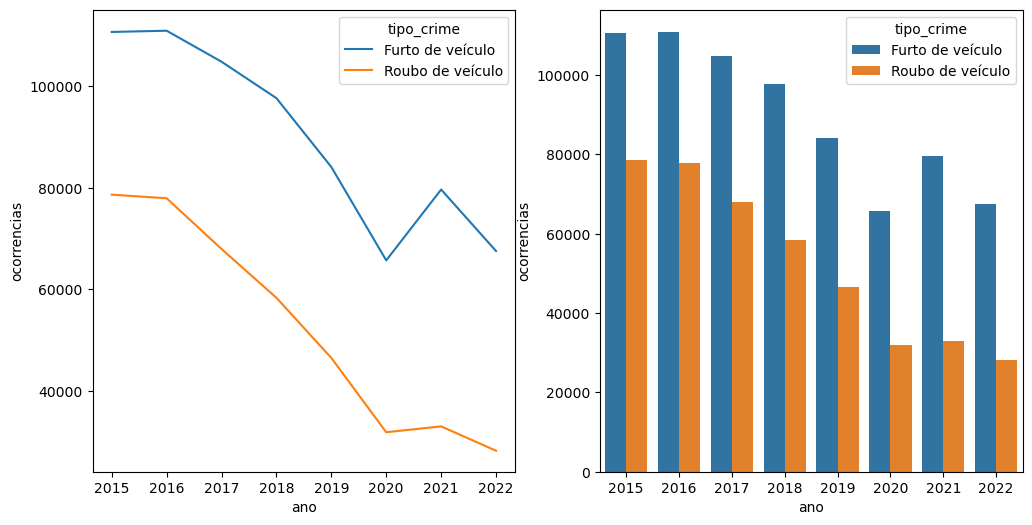

In [34]:
roubo_fur_sp_bar = roubo_fur_sp.reset_index()

fig = plt.figure(figsize=(12, 6))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[:, 0])
ax2 = fig.add_subplot(specs[:, 1])

# Primeiro gráfico
ax1 = sns.lineplot(x='ano', y='ocorrencias', hue='tipo_crime', data=roubo_fur_sp, ax=ax1)

# Segundo gráfico
ax2 = sns.barplot(x='ano', y='ocorrencias', hue='tipo_crime', data=roubo_fur_sp_bar, ax=ax2)


### Qual o terceiro crime com mais ocorrências?

In [49]:
data[['tipo_crime', 'ocorrencias']].groupby('tipo_crime').sum().reset_index().sort_values('ocorrencias', 
                                                                                         ascending=False)

,tipo_crime,ocorrencias
1,Furto de veículo,1792999
6,Roubo de veículo,1594349
0,Estupro,391167
2,Homicídio doloso,345102
8,Tentativa de homicídio,281328
5,Roubo de carga,144702
7,Roubo seguido de morte (latrocínio),13971
3,Lesão corporal seguida de morte,5924
4,Roubo a instituição financeira,5245


In [50]:
# Estupro é o terceiro crime com mais ocorrências

### Como o número de ocorrências de estupro variou ao longo do período no país e em cada estado?

In [51]:
est_total = data.loc[data['tipo_crime'] == 'Estupro'][['ano', 'ocorrencias']].groupby('ano').sum()
est_total

,ocorrencias
ano,
2015,43591
2016,46779
2017,50513
2018,53233
2019,53936
2020,48132
2021,52190
2022,42793


In [66]:
# Em todo o país

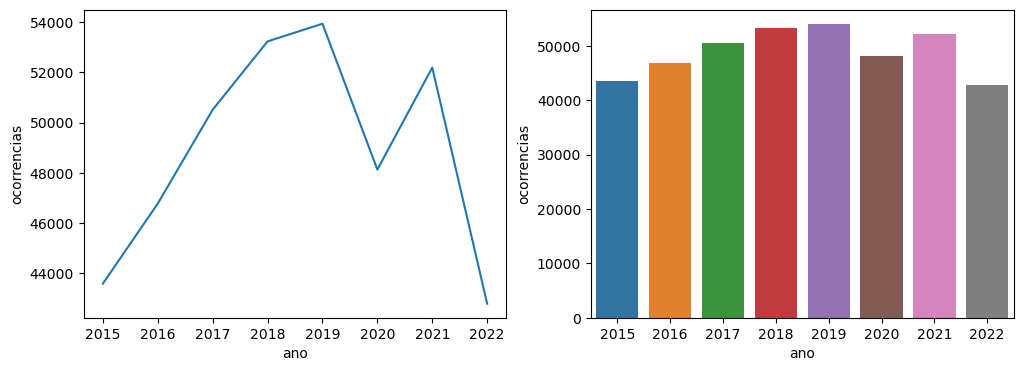

In [64]:
est_total_bar = est_total.reset_index()

fig = plt.figure(figsize=(12, 4))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[:, 0])
ax2 = fig.add_subplot(specs[:, 1])

# Primeiro gráfico
ax1 = sns.lineplot(x='ano', y='ocorrencias', data=est_total, ax=ax1)

# Segundo gráfico
ax2 = sns.barplot(x='ano', y='ocorrencias', data=est_total_bar, ax=ax2)

In [65]:
# Em cada estado

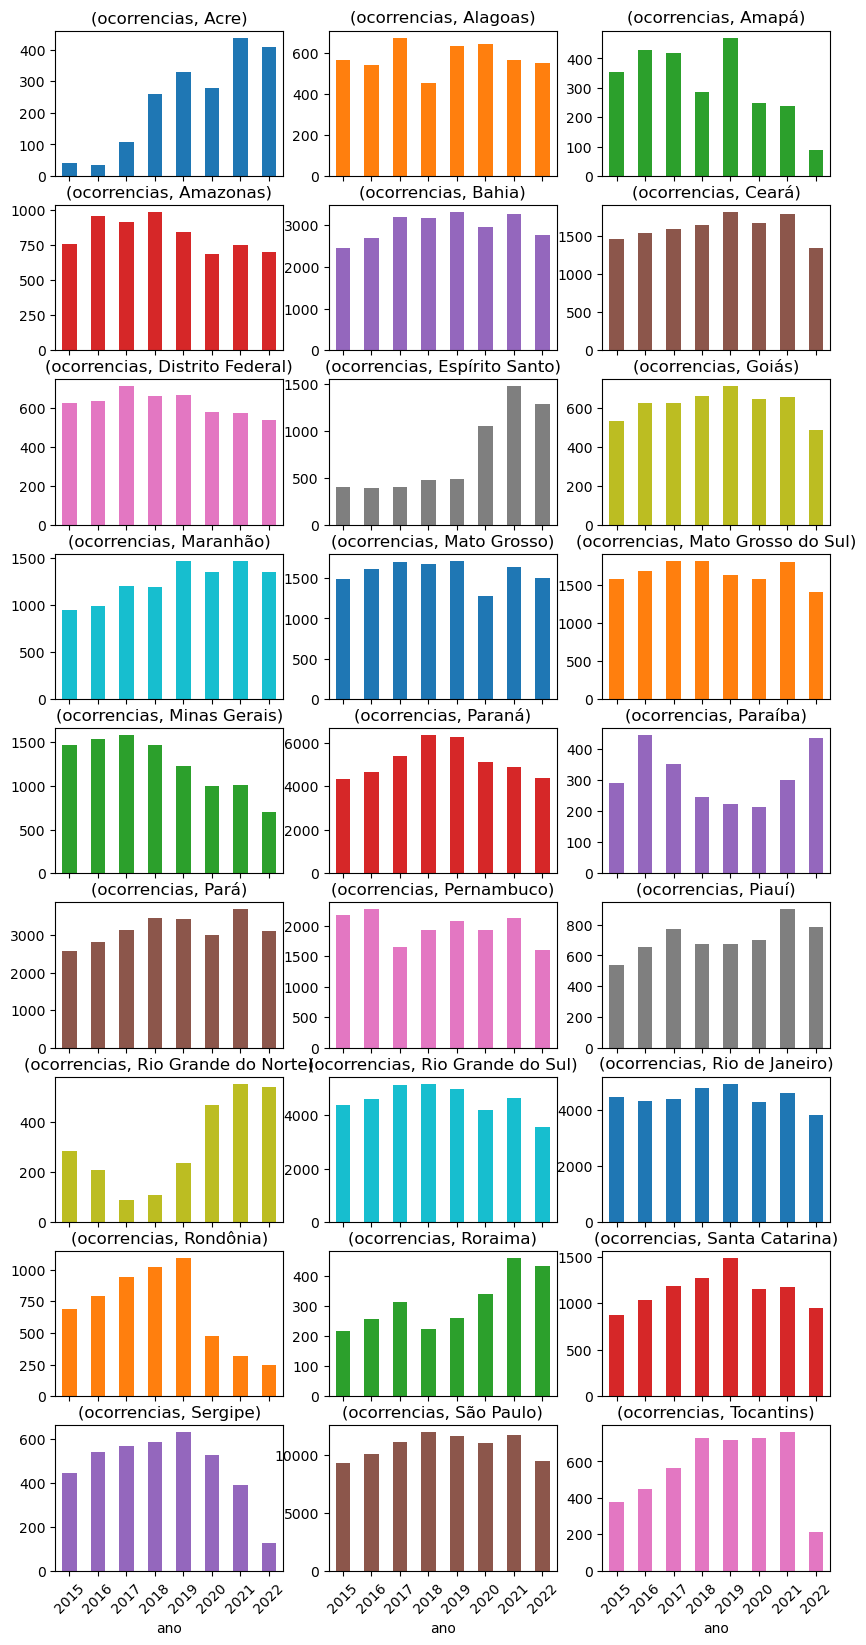

In [70]:
est_uf_ano = data.loc[data['tipo_crime'] == 'Estupro'][['uf', 'ano',
                        'ocorrencias']].groupby(['uf', 'ano']).sum()
    
ax = est_uf_ano.unstack(level=0).plot(kind='bar', legend=None, subplots=True, rot=45, 
                                     figsize=(10, 20), layout=(9, 3))
plt.tight_layout;

In [71]:
# Na maioria dos estados, teve pouca ou quase nenhuma redução ao longo do tempo

### Conclusões

* No geral, é possível notar que houve uma considerável diminuição do número de ocorrências ao longo dos anos.

* As ocorrências presentes no dataframe que mais ocorreram durante esse período foram os furtos e roubos de veículos, tendo seus picos máximos em 2016 e 2017, respectivamente.

* 13 estados registraram mais ocorrências de roubos de veículo do que furtos. 14 registraram mais furtos de veículo do que roubo.

* O estado que registrou mais furtos e roubos de veículos foi o estado de São Paulo.

* Assim como no geral, as ocorrências também sofreram uma diminuição ao longo do tempo em São Paulo.

* A terceira ocorrência mais registrada foi o estupro, tendo seu pico máximo no ano de 2019.

* No geral, a quantidade de ocorrências de estupro não variou muito, apesar de ter tido uma leve diminuição.

* O estado de São Paulo também foi o que teve a maior quantidade de ocorrências de estupro.

* Vale lembrar que São Paulo é o estado mais populoso do Brasil, o que também explica os números de ocorrências serem maiores por lá.